In [ ]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Load previously saved processed dataset
df = pd.read_csv('/content/telco_raw_loaded_converted.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


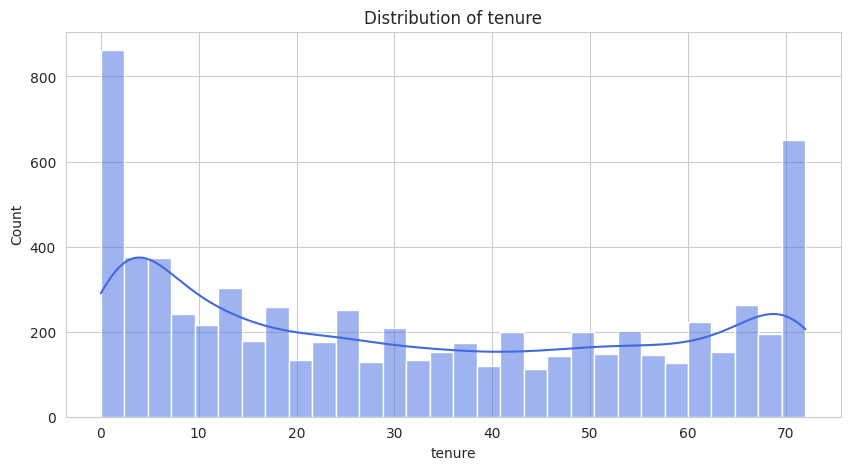

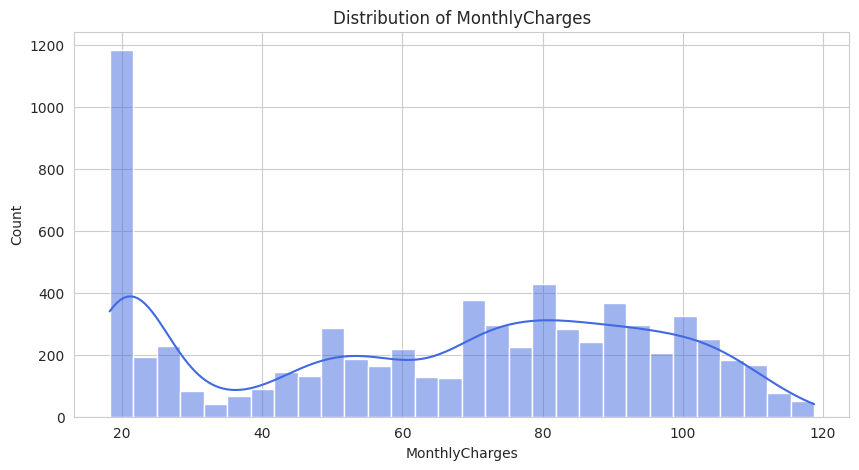

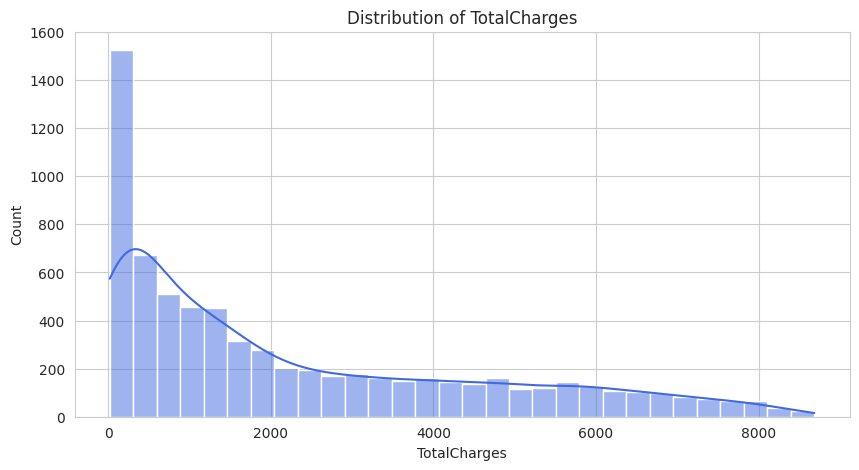

/tmp/ipython-input-1340265956.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


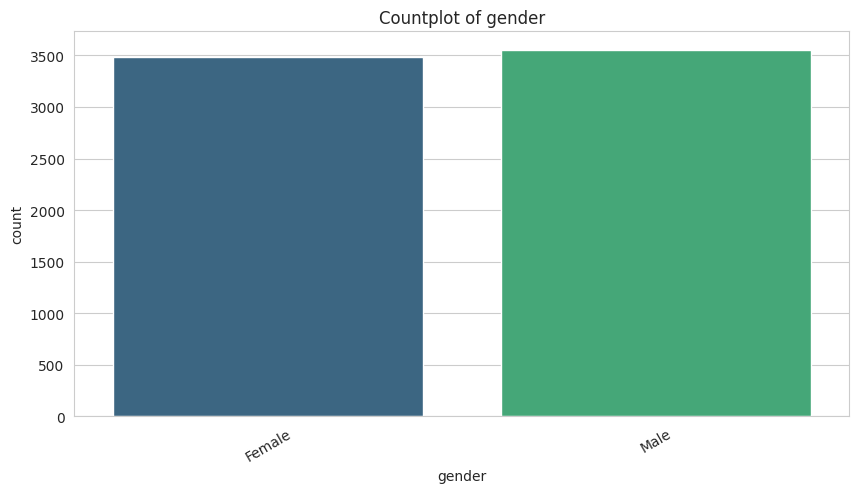

/tmp/ipython-input-1340265956.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


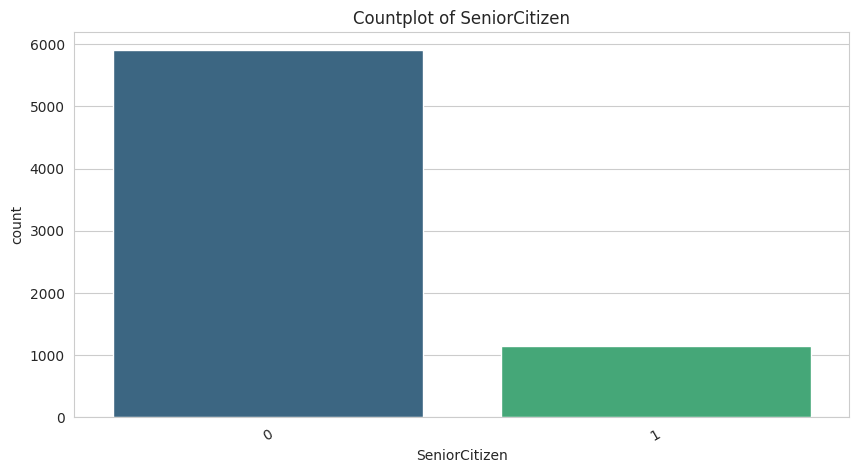

/tmp/ipython-input-1340265956.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


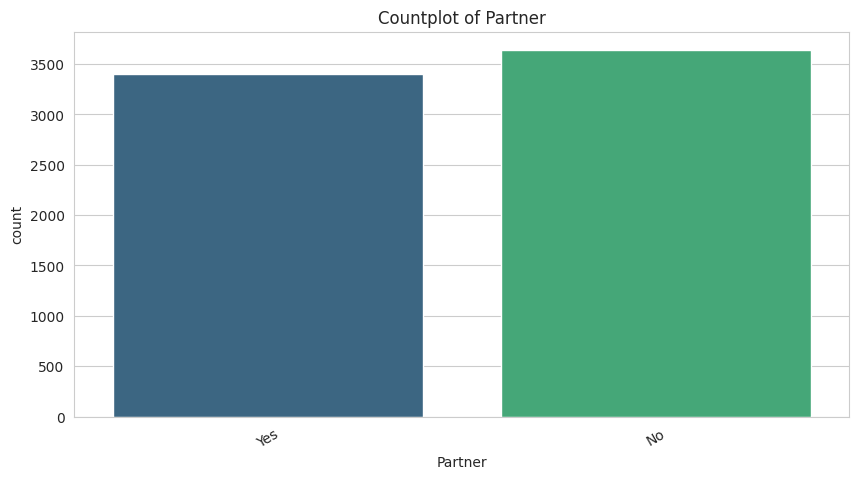

/tmp/ipython-input-1340265956.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


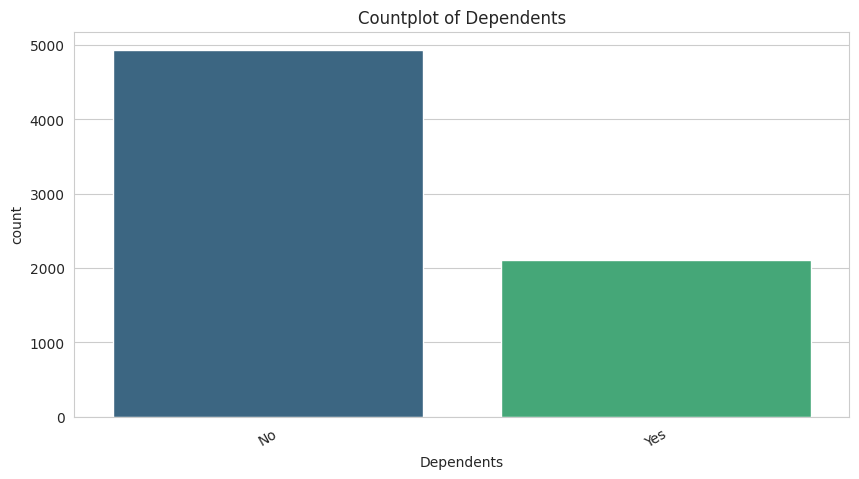

/tmp/ipython-input-1340265956.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


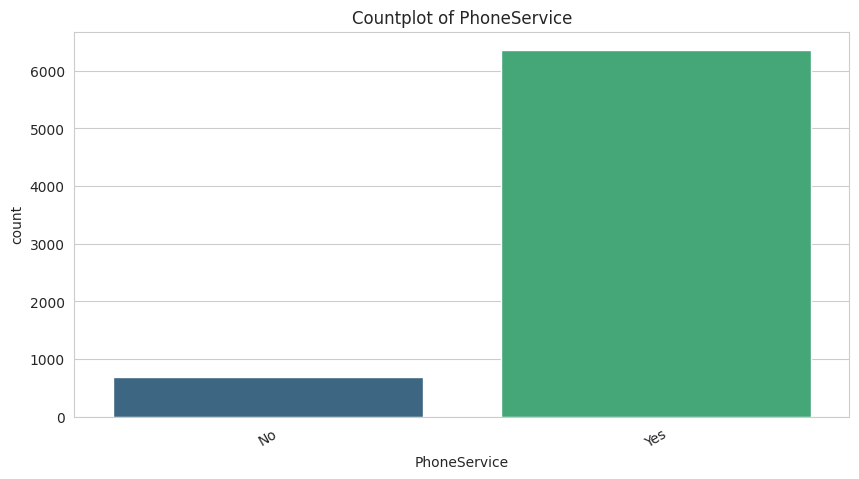

/tmp/ipython-input-1340265956.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


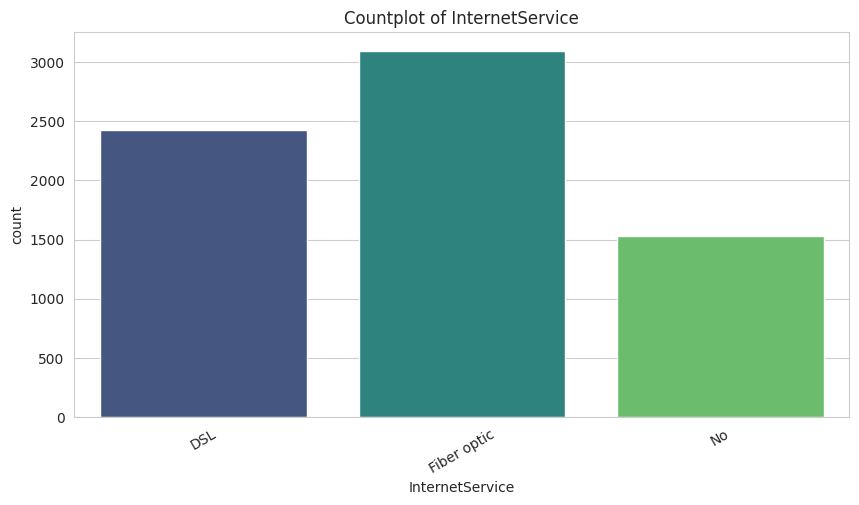

In [ ]:
# Univariate EDA (Single Variable Analysis)
# Numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30, color='royalblue')
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical columns (top 6)
cat_cols = ['gender','SeniorCitizen','Partner','Dependents',
            'PhoneService','InternetService']

for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=30)
    plt.show()

/tmp/ipython-input-1933644394.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


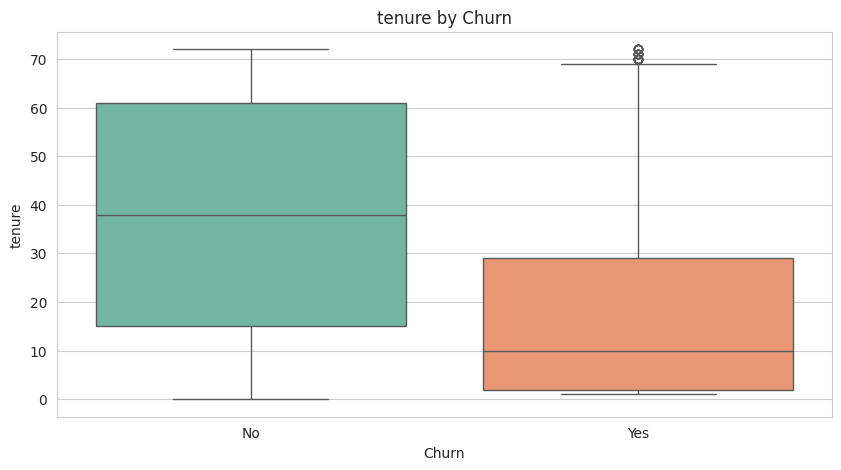

/tmp/ipython-input-1933644394.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


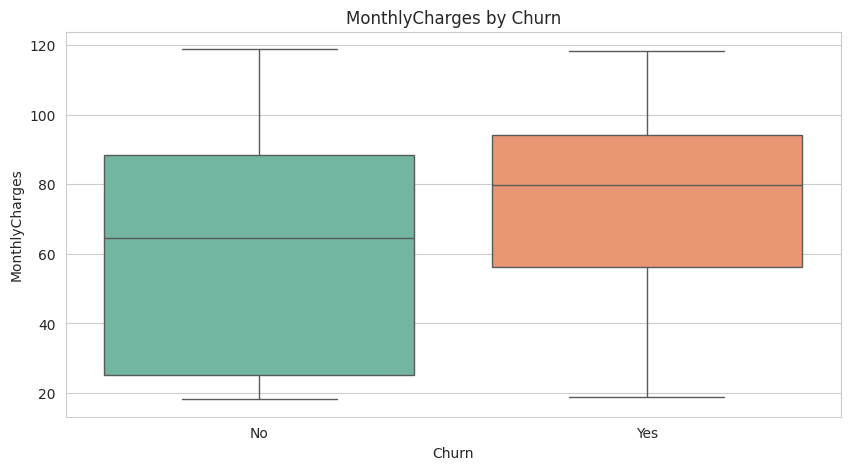

/tmp/ipython-input-1933644394.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


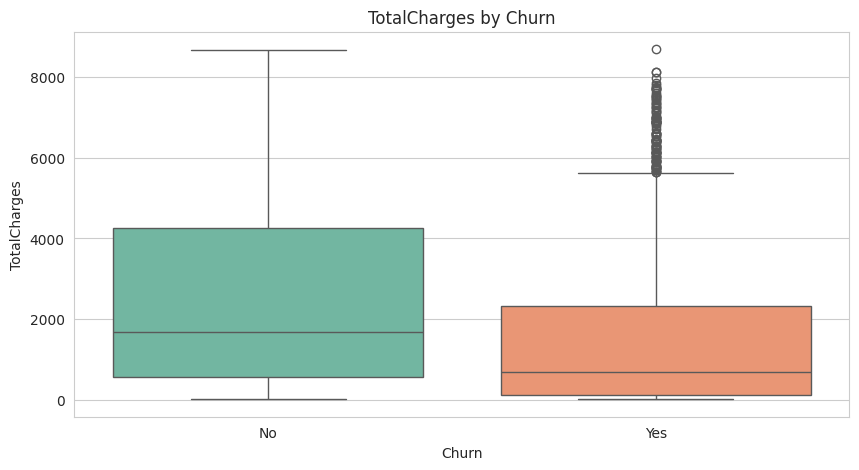

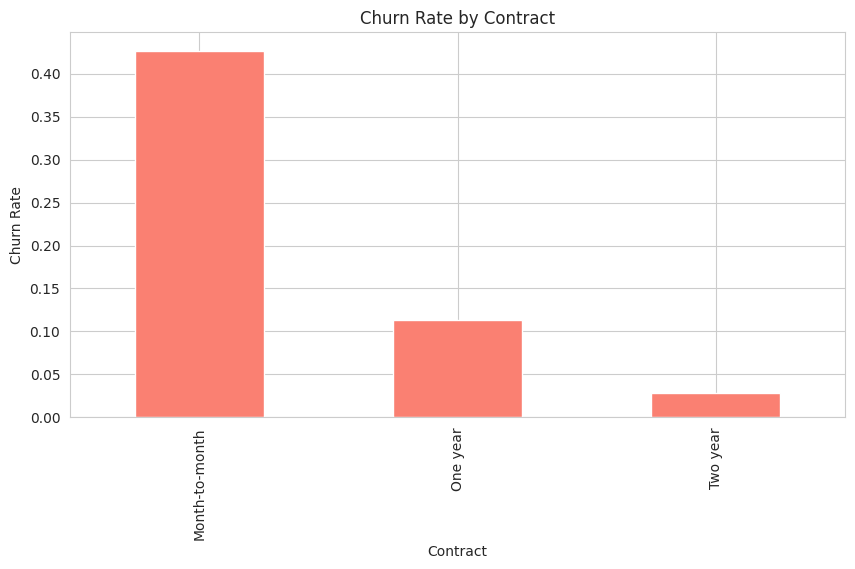

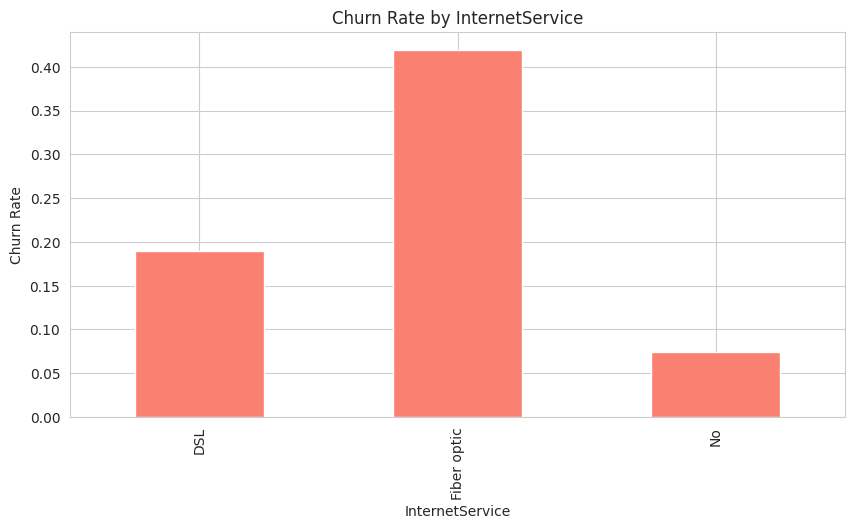

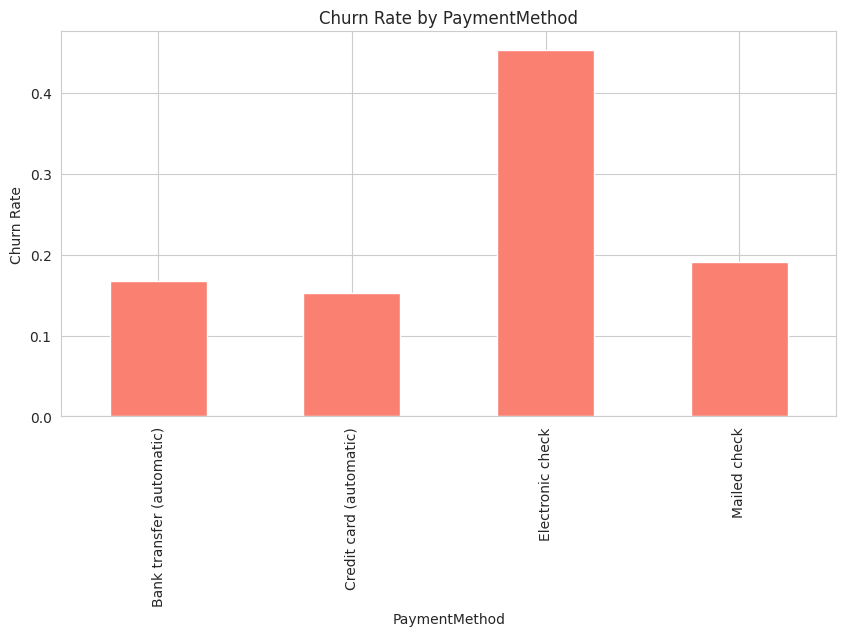

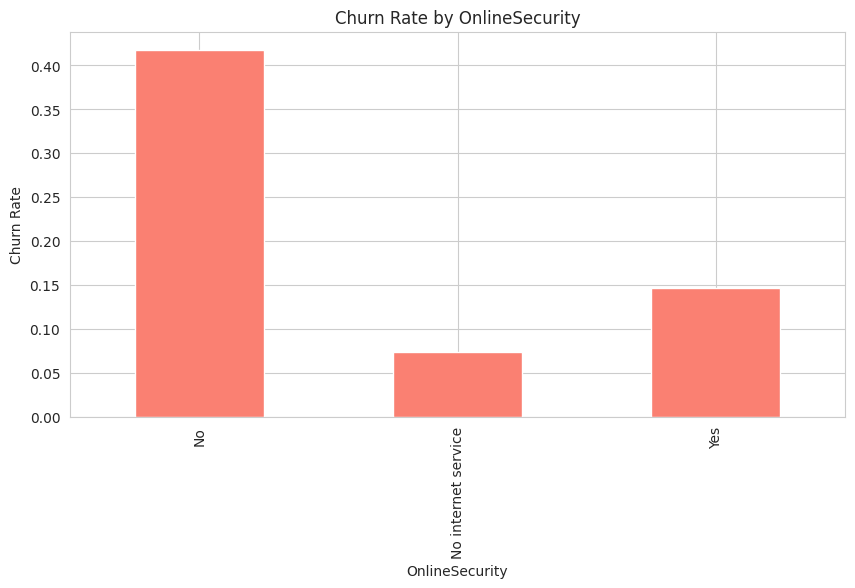

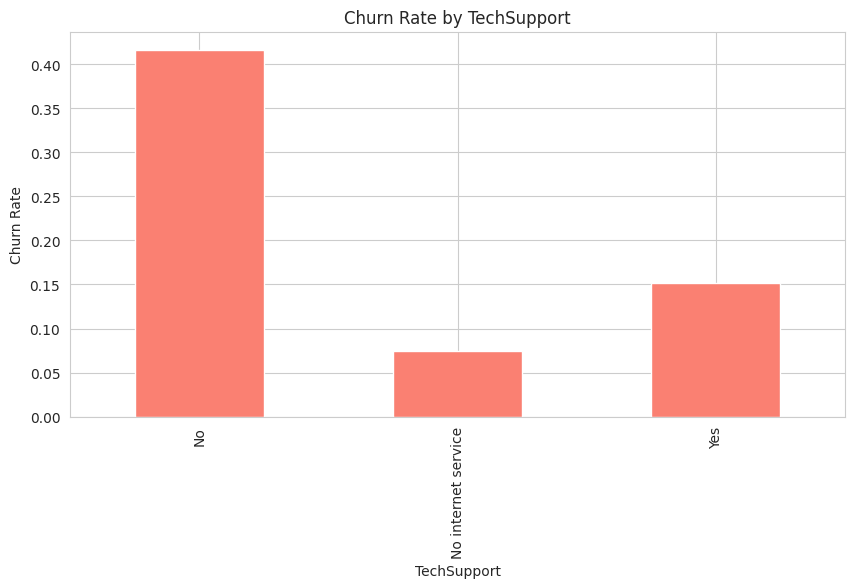

In [ ]:
# Bivariate EDA (Feature vs. Churn)
# Churn vs numerical features
for col in num_cols:
    plt.figure()
    sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
    plt.title(f'{col} by Churn')
    plt.show()

# Churn rate for key categorical variables
bivariate_cols = [
    'Contract','InternetService','PaymentMethod',
    'OnlineSecurity','TechSupport'
]

for col in bivariate_cols:
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    churn_rate['Yes'].plot(kind='bar', color='salmon')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel("Churn Rate")
    plt.show()

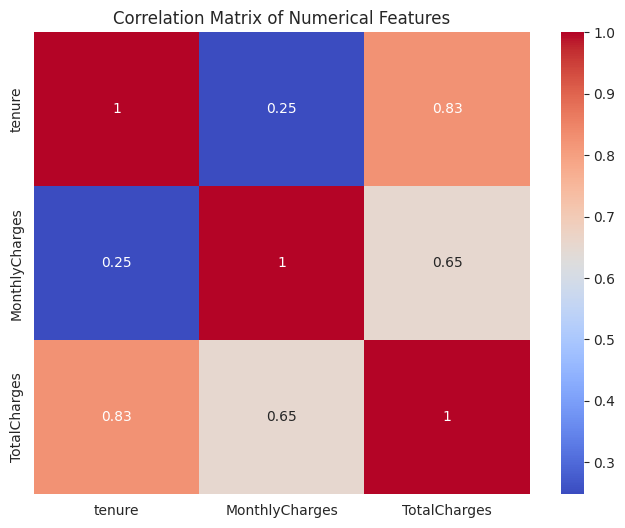

In [ ]:
# Correlation Matrix (Numerical Only)
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Insight:

Tenure and TotalCharges are strongly correlated (naturally).

MonthlyCharges has weaker correlation with churn but still important in modelling.

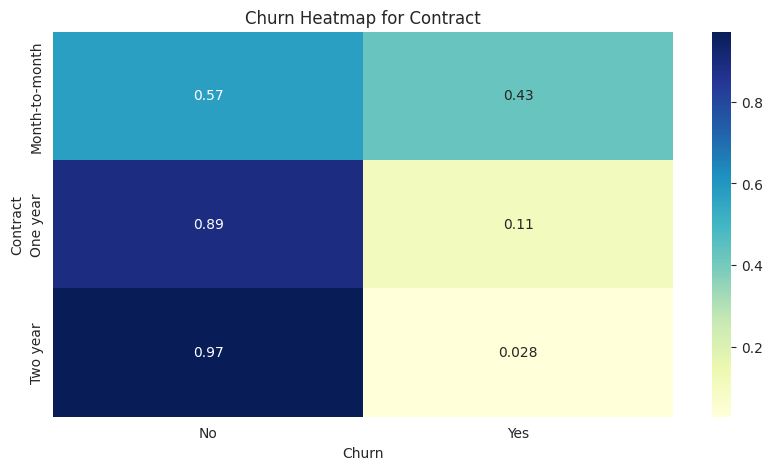

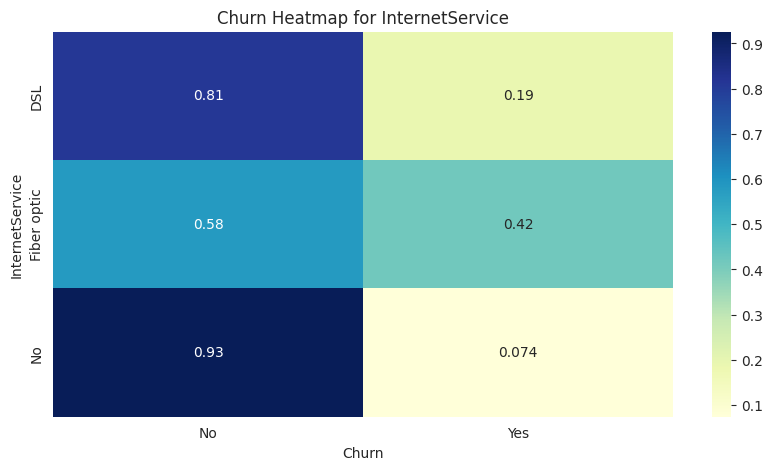

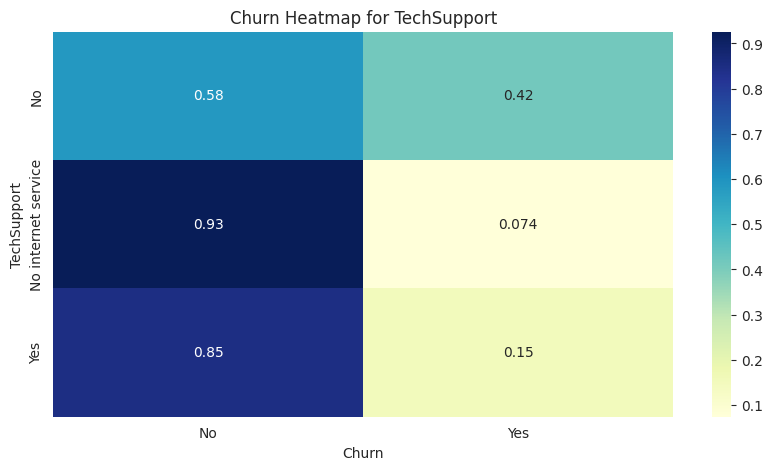

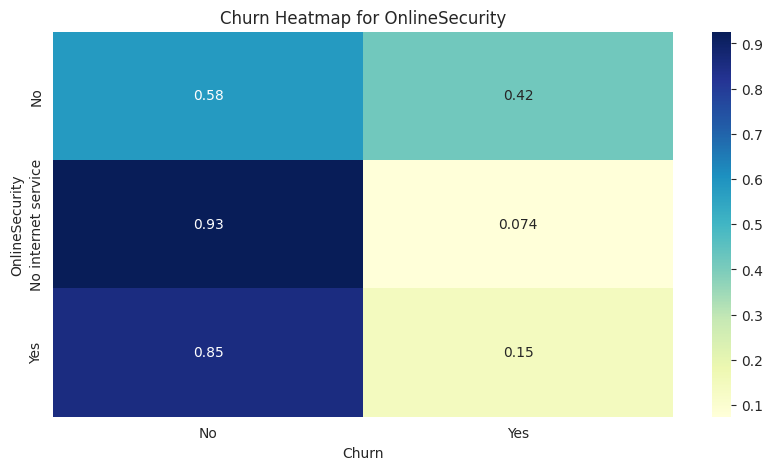

In [ ]:
# Churn Heatmap (Categorical vs Churn via Crosstab)
# Crosstab heatmap for churn vs key categorical variables
heatmap_cols = ['Contract','InternetService','TechSupport','OnlineSecurity']

for col in heatmap_cols:
    ct = pd.crosstab(df[col], df['Churn'], normalize='index')
    sns.heatmap(ct, annot=True, cmap='YlGnBu')
    plt.title(f'Churn Heatmap for {col}')
    plt.show()

**EDA Summary & Key Takeaways**


*   The dataset exhibits a clear class imbalance, with non-churn customers forming the majority, which is typical of real-world customer churn scenarios and will require appropriate handling during the modeling stage.

*   Customer tenure and contract type show a strong relationship with churn behavior, indicating that customers with shorter tenure and flexible contracts are more likely to churn.

*   Billing-related variables, such as monthly charges and payment methods, display noticeable differences between churned and retained customers, suggesting pricing and payment experience as important churn drivers.
*   Overall, the exploratory analysis confirms that the dataset contains meaningful behavioral and financial patterns relevant to churn prediction, making it suitable for feature engineering and predictive modeling in the next stage.